In [ ]:

from collections.abc import Mapping

import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2

: 

In [ ]:
! pip install --upgrade tensorflow keras numpy


: 

In [7]:
data = tf.keras.preprocessing.image_dataset_from_directory('data', batch_size=32)

Found 2000 files belonging to 2 classes.


In [9]:
data = data.map(lambda x,y: (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch

(array([[[[0.40791208, 0.44712776, 0.4157552 ],
          [0.44653416, 0.48905867, 0.46430376],
          [0.4329312 , 0.4776616 , 0.45731848],
          ...,
          [0.58145297, 0.53598726, 0.43084022],
          [0.5803922 , 0.53333336, 0.43347886],
          [0.5803922 , 0.53333336, 0.44643843]],
 
         [[0.3723269 , 0.4148514 , 0.38347885],
          [0.4182598 , 0.46130133, 0.43654642],
          [0.43328354, 0.47801393, 0.4576708 ],
          ...,
          [0.604159  , 0.5547641 , 0.44961703],
          [0.582667  , 0.5284735 , 0.4282552 ],
          [0.5794616 , 0.52247626, 0.43254825]],
 
         [[0.37606847, 0.41920573, 0.38783318],
          [0.3743796 , 0.41751686, 0.39276195],
          [0.38606772, 0.4314453 , 0.40916052],
          ...,
          [0.6162454 , 0.5641812 , 0.45744103],
          [0.59976256, 0.54399896, 0.4438764 ],
          [0.6064147 , 0.54599804, 0.45580193]],
 
         ...,
 
         [[0.17785692, 0.18018536, 0.16535692],
          [0.19888

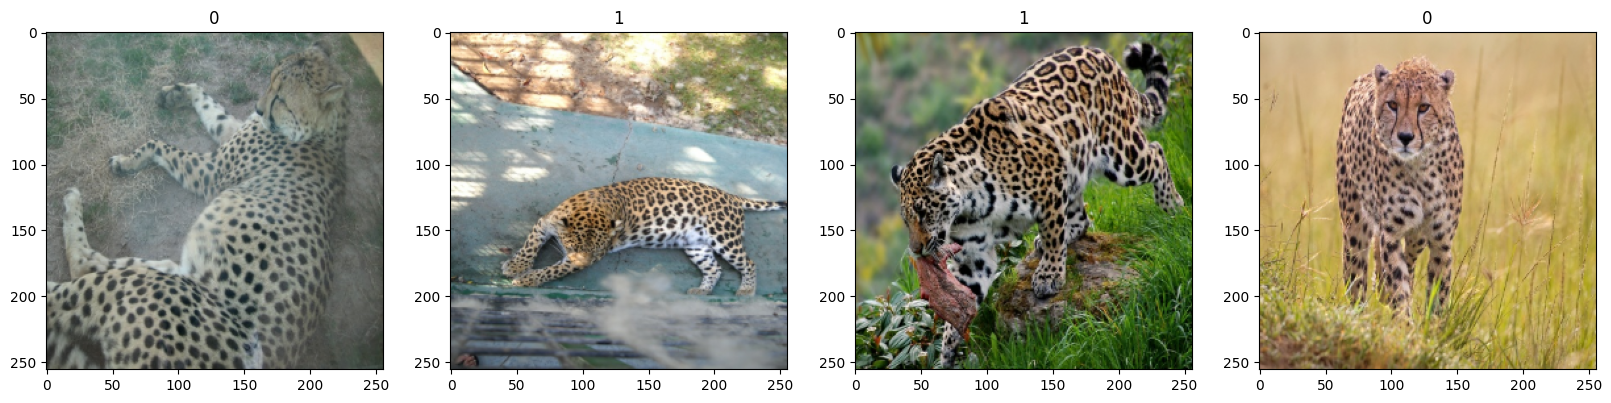

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [12]:
train_size = int(len(data)*0.6)
test_size = int(len(data)*0.2)
val_size = int(len(data)*0.2)

In [13]:
train = data.take(train_size)
test = data.take(test_size)
val = data.take(val_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3))) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
tensor_cb = tf.keras.callbacks.TensorBoard(log_dir='logs')
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensor_cb])

In [19]:
import cv2
import numpy as np
test_img1 = cv2.imread('jaguar.jpg')
result = int(model.predict(np.expand_dims(test_img1/255,0)) > 0.5)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step


C:\Users\clarissa\AppData\Local\Temp\ipykernel_37712\1128118525.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result = int(model.predict(np.expand_dims(test_img1/255,0)) > 0.5)


1

In [20]:
test_img1 = cv2.imread('chee.jpg')
result = int(model.predict(np.expand_dims(test_img1/255,0)) > 0.5)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\clarissa\AppData\Local\Temp\ipykernel_37712\3015058000.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result = int(model.predict(np.expand_dims(test_img1/255,0)) > 0.5)


0

In [21]:
test_img1 = cv2.imread('chee.jpg')
result = int(model.predict(np.expand_dims(test_img1/255,0)) > 0.5)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\clarissa\AppData\Local\Temp\ipykernel_37712\3015058000.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result = int(model.predict(np.expand_dims(test_img1/255,0)) > 0.5)


0

In [22]:
model.evaluate(test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - accuracy: 1.0000 - loss: 1.9190e-04


[0.00018115935381501913, 1.0]

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [3]:
base_model = MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,  # Don't include the classification layer
    weights='imagenet'  # Pre-trained on ImageNet
)

base_model.trainable = False  


C:\Users\clarissa\AppData\Local\Temp\ipykernel_37712\3059431285.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

In [5]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
tensor_cb = tf.keras.callbacks.TensorBoard(log_dir='logs')
hist = model.fit(train, epochs=35, validation_data=val, callbacks=[tensor_cb])

Epoch 1/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 479ms/step - accuracy: 0.9926 - loss: 0.0197 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 2/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 494ms/step - accuracy: 0.9949 - loss: 0.0171 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 3/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 515ms/step - accuracy: 0.9977 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 484ms/step - accuracy: 0.9987 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 487ms/step - accuracy: 0.9951 - loss: 0.0131 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 6/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 500ms/step - accuracy: 0.9975 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 503ms/step - accuracy: 0.9991 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 513ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accu

In [23]:
model.evaluate(test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 1.0000 - loss: 1.9344e-04


[0.00014754162111785263, 1.0]

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751,301 (10.50 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

 Optimizer params: 328,708 (1.25 MB)

In [25]:
model.save('cheetah_jaguar_transfer_model.keras')